In [23]:
# Mounting Drive

In [24]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [25]:
# Importing Librarie(s)

import pandas as pd, numpy as np
import datetime, pytz

local_tz = pytz.timezone('Asia/Kolkata')  # Replace with your time zone

#from sktime import sliding_window_view



In [26]:
# !pip install sktime

In [27]:

#file_path = "/content/drive/Computers/Omen/Gdrive/data-quant/BTC"
file_path = "/content/drive/MyDrive/Quantvaala/Data/data-quant/BTC"
model_path = "/content/drive/MyDrive/Quantvaala/Data/model-quant/BTC"

symbol = "BTC"
ctime = "15m"

file1 = "data_2020_2023_15min.csv"
# file2 = "data_2020_2023_15min.csv"

pricesdf1 = pd.read_csv(f"{file_path}/{file1}", index_col=0)
print(pricesdf1.columns.values.tolist())
print(pricesdf1.shape)

# pricesdf2 = pd.read_csv(f"{file_path}/{file2}", index_col=0)
# print(pricesdf2.columns.values.tolist())
# print(pricesdf2.shape)


# print(f"Importing {file1} for {symbol}")
# pricesdf = pd.read_csv(f"{file_path}", index_col=0)

# Use pd.concat to combine them
print()
#pricesdf = pd.concat( [pricesdf1, pricesdf2], ignore_index=True )

# pricesdf = pd.concat( [pricesdf1, pricesdf2])
pricesdf = pricesdf1.copy()
# pricesdf[['open','high','low','close']] = pricesdf[['open','high','low','close']]#.astype('float64')
pricesdf[['open','high','low','close']] = pricesdf[['open','high','low','close']] / 100000


print(pricesdf.columns.values.tolist())
print(pricesdf.shape)

del pricesdf1


['open', 'high', 'low', 'close', 'volume']
(140104, 5)

['open', 'high', 'low', 'close', 'volume']
(140104, 5)


In [28]:

display(pricesdf.head())
display(pricesdf.tail())


,open,high,low,close,volume
datetime,,,,,
2020-01-01 05:30:00,0.071952,0.071962,0.071782,0.071810,202.942868
2020-01-01 05:45:00,0.071810,0.071864,0.071755,0.071785,128.242654
2020-01-01 06:00:00,0.071782,0.071854,0.071762,0.071796,83.487458
2020-01-01 06:15:00,0.071794,0.071840,0.071755,0.071770,97.141921
2020-01-01 06:30:00,0.071765,0.071940,0.071757,0.071909,103.520522


,open,high,low,close,volume
datetime,,,,,
2024-01-01 04:30:00,0.422579,0.423457,0.421966,0.422301,637.99923
2024-01-01 04:45:00,0.422301,0.422351,0.420660,0.421818,614.77027
2024-01-01 05:00:00,0.421818,0.422429,0.421543,0.422411,215.21045
2024-01-01 05:15:00,0.422411,0.422836,0.422212,0.422836,242.15726
2024-01-01 05:30:00,0.422836,0.424881,0.422610,0.424880,431.71082


In [29]:

pricesdf.dtypes


open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object

In [30]:

# Generating Train x Test Split at 80% and 20%

pricesdf.index = pd.to_datetime(pricesdf.index, format='%Y-%m-%d %H:%M:%S')

columns_for_prediction = ["close","volume"]

data_train = pd.DataFrame(pricesdf[columns_for_prediction][0: int(len(pricesdf)*0.80)])
print(data_train.shape)
display(data_train.tail(5))

data_test = pd.DataFrame(pricesdf[columns_for_prediction][int(len(pricesdf)*0.80): len(pricesdf)])
print(data_test.shape)
display(data_test.tail(5))


(112083, 2)


,close,volume
datetime,,
2023-03-15 06:00:00,0.244976,6699.35874
2023-03-15 06:15:00,0.247201,5999.89880
2023-03-15 06:30:00,0.248730,7818.09424
2023-03-15 06:45:00,0.249271,7247.35143
2023-03-15 07:00:00,0.248708,5347.17162


(28021, 2)


,close,volume
datetime,,
2024-01-01 04:30:00,0.422301,637.99923
2024-01-01 04:45:00,0.421818,614.77027
2024-01-01 05:00:00,0.422411,215.21045
2024-01-01 05:15:00,0.422836,242.15726
2024-01-01 05:30:00,0.424880,431.71082


In [47]:
# Uses Min/Max Normalisation

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

# Select the column(s) to scale
columns_to_scale = ['volume']

"""
data_train_temp = data_train.copy()
data_train_temp[columns_to_scale] = scaler.fit_transform(data_train_temp[columns_to_scale])

# data_train_scale = scaler.fit_transform(data_train)
data_train_scale = data_train_temp.values

print(data_train_scale.shape)
del data_train_temp
"""

# Scale the selected columns and replace in the dataframe
def scale_dataset(data, columns_to_scale):
    # Create a copy of the dataset to avoid modifying the original data
    data_temp = data.copy()

    # Initialize the scaler
    scaler = MinMaxScaler()
    # scaler = StandardScaler()

    # Fit the scaler on the specified columns of the training data
    # and transform these columns
    data_temp[columns_to_scale] = scaler.fit_transform(data_temp[columns_to_scale])

    # Return the scaled dataset
    return data_temp.values

data_train_scale = scale_dataset(data_train, columns_to_scale)



## SCALNG THE TEST DATAFRAME TOO
pas_100_days = data_train.tail(100)
data_test_comb = pd.concat([pas_100_days, data_test], ignore_index=False)

# data_test_scale = scaler.fit_transform(data_test)
data_test_scale = scale_dataset(data_test_comb, columns_to_scale)

## Creating timestamps for the plotting later
timestamps = data_test.index



In [50]:

display(data_train_scale[:5])
print(type(data_train_scale)) # <class 'numpy.ndarray'>
print(len(data_train_scale)) #150222

print()
print()

display(data_test_scale[:5])
print(type(data_test_scale)) # <class 'numpy.ndarray'>

print(len(data_test))
print(len(data_test_comb))
print(len(data_test_scale))


array([[0.0718097 , 0.0050269 ],
       [0.0717845 , 0.00317657],
       [0.0717956 , 0.00206798],
       [0.0717702 , 0.00240621],
       [0.0719086 , 0.0025642 ]])

<class 'numpy.ndarray'>
112083




array([[0.2416631 , 0.19712138],
       [0.241467  , 0.15045807],
       [0.2428685 , 0.16683823],
       [0.2420982 , 0.17962065],
       [0.2440253 , 0.24718271]])

<class 'numpy.ndarray'>
28021
28121
28121


In [52]:

sequence_length = 100  # Number of time steps in each input sequence

# Splitting the predictors into list of list of 100 points to make predictions about one y data point

x = []
y = []

x_tst = []
y_tst = []

if data_train.shape[1] == 1:

  print(f"Creating x & Y for data_train {data_train.shape}")

  for i in range(sequence_length, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

  for i in range(100, data_test_scale.shape[0]):
    x_tst.append(data_test_scale[i-100:i])
    y_tst.append(data_test_scale[i,0])


elif data_train.shape[1] > 1:

  print(f"Creating x & Y for data_train {data_train.shape}")

  for i in range(sequence_length, data_train_scale.shape[0]):
    x.append(data_train_scale[i-sequence_length:i, :])  # Selecting all features for the last 'sequence_length' time steps
    y.append(data_train_scale[i, 0])  # You might need to adjust this if you're predicting something other than the first feature

  for i in range(sequence_length, data_test_scale.shape[0]):
    x_tst.append(data_test_scale[i-sequence_length:i, :])  # Selecting all features for the last 'sequence_length' time steps
    y_tst.append(data_test_scale[i, 0])  # You might need to adjust this if you're predicting something other than the first feature

x, y = np.array(x), np.array(y)
print(x.shape, y.shape)

x_tst, y_tst = np.array(x_tst), np.array(y_tst)
print(x_tst.shape, y_tst.shape)

print()

"""
# Assuming you have your pricesdf DataFrame with the datetime index

window_size = 100  # Size of the input window

# Convert pricesdf to a sktime Series object
y = pricesdf['close'].to_numpy()  # Target variable
X = sliding_window_view(y, window_size=window_size, stride=1)  # Input sequences

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[window_size:train_size+window_size]
X_test, y_test = X[train_size:], y[train_size+window_size:]

# Convert back to pandas objects if needed
X_train = pd.DataFrame(X_train, index=pricesdf.index[:-window_size+1][:train_size])
X_test = pd.DataFrame(X_test, index=pricesdf.index[:-window_size+1][train_size:])
y_train = pd.Series(y_train, index=pricesdf.index[window_size:train_size+window_size])
y_test = pd.Series(y_test, index=pricesdf.index[train_size+window_size:])

"""

Creating x & Y for data_train (112083, 2)
(111983, 100, 2) (111983,)
(28021, 100, 2) (28021,)



"\n# Assuming you have your pricesdf DataFrame with the datetime index\n\nwindow_size = 100  # Size of the input window\n\n# Convert pricesdf to a sktime Series object\ny = pricesdf['close'].to_numpy()  # Target variable\nX = sliding_window_view(y, window_size=window_size, stride=1)  # Input sequences\n\n# Split into train and test sets\ntrain_size = int(len(X) * 0.8)\nX_train, y_train = X[:train_size], y[window_size:train_size+window_size]\nX_test, y_test = X[train_size:], y[train_size+window_size:]\n\n# Convert back to pandas objects if needed\nX_train = pd.DataFrame(X_train, index=pricesdf.index[:-window_size+1][:train_size])\nX_test = pd.DataFrame(X_test, index=pricesdf.index[:-window_size+1][train_size:])\ny_train = pd.Series(y_train, index=pricesdf.index[window_size:train_size+window_size])\ny_test = pd.Series(y_test, index=pricesdf.index[train_size+window_size:])\n\n"

In [53]:
x.shape

(111983, 100, 2)

In [54]:
del model

In [55]:

# Building the model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
# model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x.shape[1:],1)  ) )
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x.shape[1:]) ) )
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [56]:

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [57]:

# model.fit(x,y, epochs = 3, batch_size =32, verbose =1)
model.fit(x,y, epochs = 3, batch_size =2048, verbose =1)
# run-time is 0.5 hours x epochs
# run-time is 0.4 hours x epochs with A100 GPU, bsize = 32

# run-time is 1 min x epochs with A100 GPU, bsize = 1024


Epoch 1/3
55/55 [==============================] - 27s 410ms/step - loss: 0.0160
Epoch 2/3
55/55 [==============================] - 23s 413ms/step - loss: 0.0026
Epoch 3/3
55/55 [==============================] - 23s 416ms/step - loss: 0.0021


In [58]:

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10600     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [59]:

xnan = np.any(np.isnan(x_tst))
ynan = np.any(np.isnan(y_tst))

print(f"x_tst :{x_tst}, y_tst :{y_tst}")
print(f"xnan :{xnan}, ynan :{ynan}")



x_tst :[[[0.2416631  0.19712138]
  [0.241467   0.15045807]
  [0.2428685  0.16683823]
  ...
  [0.2487305  0.26093823]
  [0.2492712  0.24188901]
  [0.2487085  0.17846824]]

 [[0.241467   0.15045807]
  [0.2428685  0.16683823]
  [0.2420982  0.17962065]
  ...
  [0.2492712  0.24188901]
  [0.2487085  0.17846824]
  [0.2490601  0.12675841]]

 [[0.2428685  0.16683823]
  [0.2420982  0.17962065]
  [0.2440253  0.24718271]
  ...
  [0.2487085  0.17846824]
  [0.2490601  0.12675841]
  [0.2485174  0.10292997]]

 ...

 [[0.4223453  0.00274026]
  [0.4213273  0.00763125]
  [0.4223069  0.00849344]
  ...
  [0.4225788  0.03868858]
  [0.4223013  0.02129399]
  [0.421818   0.02051869]]

 [[0.4213273  0.00763125]
  [0.4223069  0.00849344]
  [0.4224201  0.00502855]
  ...
  [0.4223013  0.02129399]
  [0.421818   0.02051869]
  [0.4224109  0.00718291]]

 [[0.4223069  0.00849344]
  [0.4224201  0.00502855]
  [0.4217936  0.00538846]
  ...
  [0.421818   0.02051869]
  [0.4224109  0.00718291]
  [0.4228358  0.00808229]]], y_

In [60]:

y_predict = model.predict(x_tst)
#run-time is 1.5 minute(s) = 1 epoch of training

print(y_predict)


876/876 [==============================] - 53s 60ms/step
[[0.24463335]
 [0.24416985]
 [0.24373436]
 ...
 [0.4040141 ]
 [0.40393248]
 [0.40382418]]


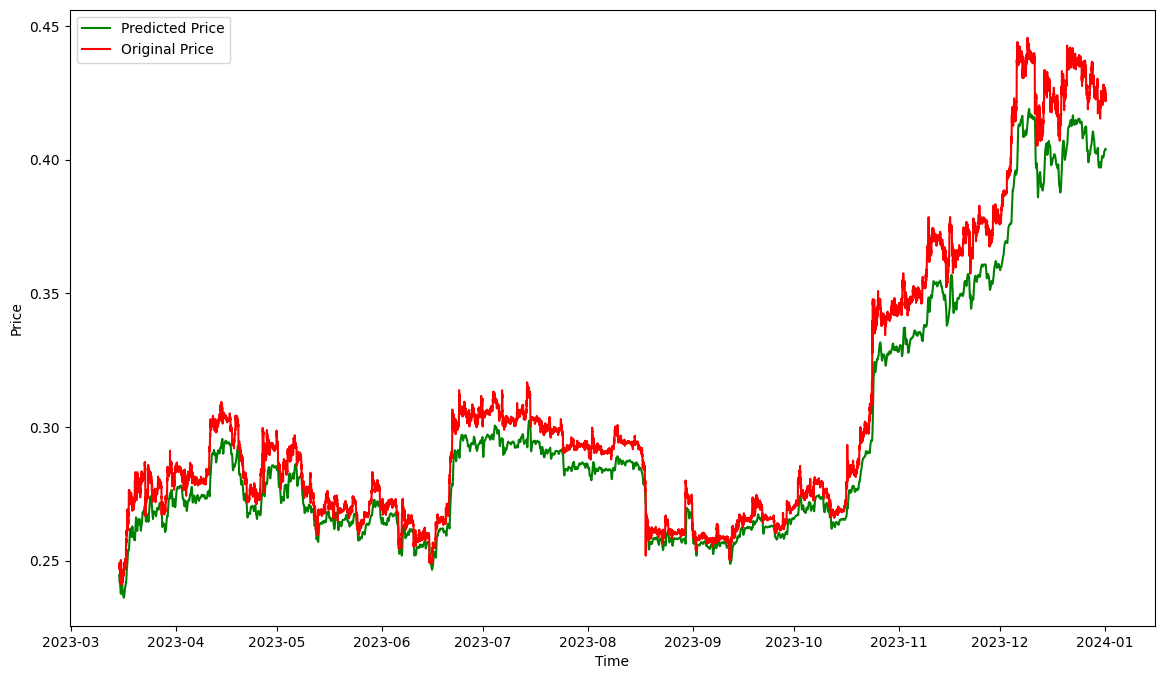

In [62]:

import matplotlib.pyplot as plt


plt.figure(figsize=(14,8))
plt.plot(timestamps, y_predict, 'g', label = 'Predicted Price')
plt.plot(timestamps, y_tst, 'r', label = 'Original Price')

plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()

plt.show()


In [64]:
y_predict

array([[0.24463335],
       [0.24416985],
       [0.24373436],
       ...,
       [0.4040141 ],
       [0.40393248],
       [0.40382418]], dtype=float32)

In [65]:
print(timestamps.shape, y_predict.shape, y_tst.shape)

(28021,) (28021, 1) (28021,)


In [70]:
## EVALUATION

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Combine into a DataFrame
evaldf = pd.DataFrame({
    'Predicted': y_predict.ravel(),
    'Actual': y_tst
    }, index = timestamps )

# Calculate MSE and MAE
mse = np.sqrt(mean_squared_error(evaldf['Actual'], evaldf['Predicted']))
mae = mean_absolute_error(evaldf['Actual'], evaldf['Predicted'])

print(f'Mean Squared Error: {mse*100000}')
print(f'Mean Absolute Error: {mae*100000}')


Mean Squared Error: 1213.7037898509654
Mean Absolute Error: 1009.6300728226001


In [69]:

evaldf.sample(5)


,Predicted,Actual
datetime,,
2023-04-27 06:45:00,0.274142,0.288483
2023-06-20 23:15:00,0.262611,0.277960
2023-08-09 05:15:00,0.286591,0.297704
2023-09-05 00:15:00,0.255633,0.259157
2023-11-16 20:15:00,0.354686,0.367082


In [71]:

# Function to resample and calculate errors
def calculate_errors(group):
    rmse = np.sqrt(mean_squared_error(group['Actual'], group['Predicted']))
    mae = mean_absolute_error(group['Actual'], group['Predicted'])
    return pd.Series({'MSE': rmse*100000, 'MAE': mae*100000})

# Calculate errors by week, month, and quarter
weekly_errors = evaldf.resample('W').apply(calculate_errors)
monthly_errors = evaldf.resample('M').apply(calculate_errors)
quarterly_errors = evaldf.resample('Q').apply(calculate_errors)

# Example output
print("Weekly Errors:\n", weekly_errors.head())
print("\nMonthly Errors:\n", monthly_errors.head())
print("\nQuarterly Errors:\n", quarterly_errors.head())


Weekly Errors:
                     MSE          MAE
datetime                            
2023-03-19  1161.208743  1061.746525
2023-03-26  1212.887439  1133.684538
2023-04-02   898.199798   853.741094
2023-04-09   745.159903   718.160994
2023-04-16  1147.416365  1112.266903

Monthly Errors:
                     MSE          MAE
datetime                            
2023-03-31  1125.698780  1044.934494
2023-04-30   951.381723   894.489736
2023-05-31   662.965333   611.300491
2023-06-30   797.794837   678.575736
2023-07-31   942.200228   916.869840

Quarterly Errors:
                     MSE          MAE
datetime                            
2023-03-31  1125.698780  1044.934494
2023-06-30   811.140342   726.838235
2023-09-30   711.826112   631.430111
2023-12-31  1809.676478  1658.244559
2024-03-31  2136.136462  2129.280011


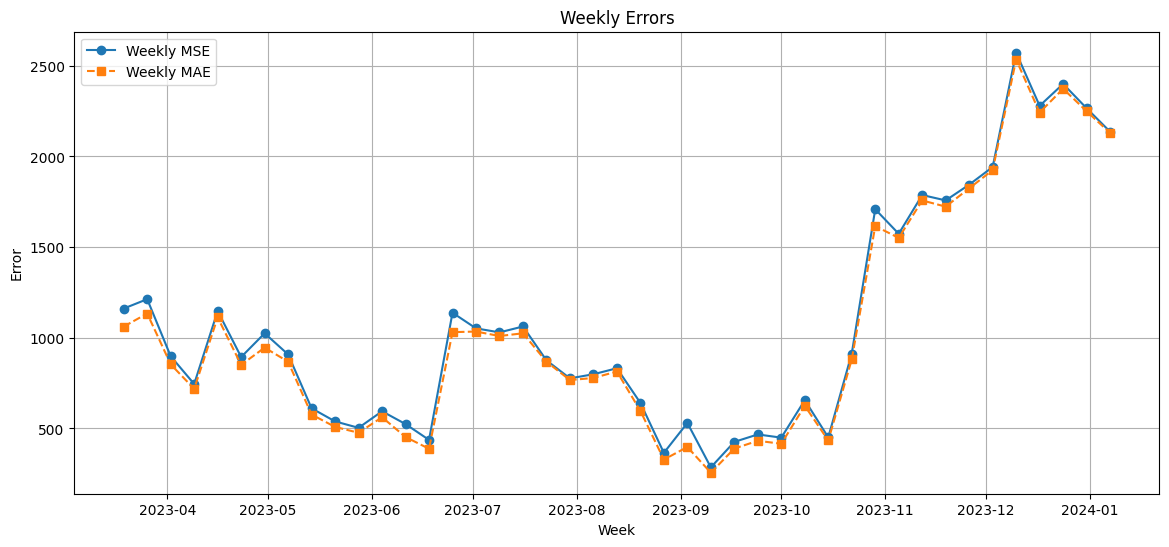

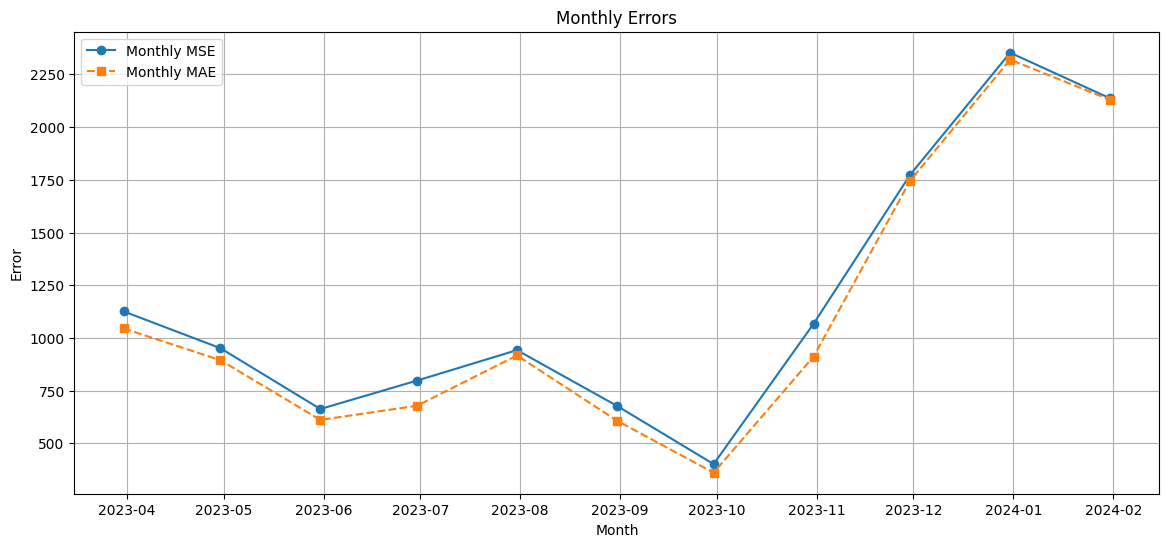

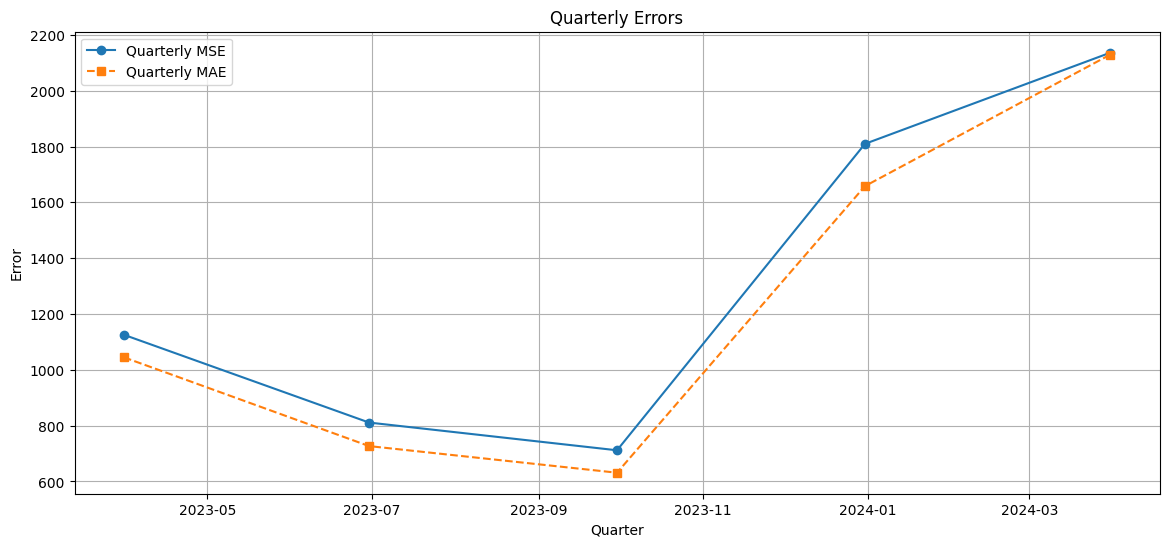

In [72]:

import matplotlib.pyplot as plt

# Plot Weekly Errors
plt.figure(figsize=(14, 6))
plt.plot(weekly_errors.index, weekly_errors['MSE'], label='Weekly MSE', marker='o', linestyle='-')
plt.plot(weekly_errors.index, weekly_errors['MAE'], label='Weekly MAE', marker='s', linestyle='--')
plt.title('Weekly Errors')
plt.xlabel('Week')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot Monthly Errors
plt.figure(figsize=(14, 6))
plt.plot(monthly_errors.index, monthly_errors['MSE'], label='Monthly MSE', marker='o', linestyle='-')
plt.plot(monthly_errors.index, monthly_errors['MAE'], label='Monthly MAE', marker='s', linestyle='--')
plt.title('Monthly Errors')
plt.xlabel('Month')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot Quarterly Errors
plt.figure(figsize=(14, 6))
plt.plot(quarterly_errors.index, quarterly_errors['MSE'], label='Quarterly MSE', marker='o', linestyle='-')
plt.plot(quarterly_errors.index, quarterly_errors['MAE'], label='Quarterly MAE', marker='s', linestyle='--')
plt.title('Quarterly Errors')
plt.xlabel('Quarter')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()



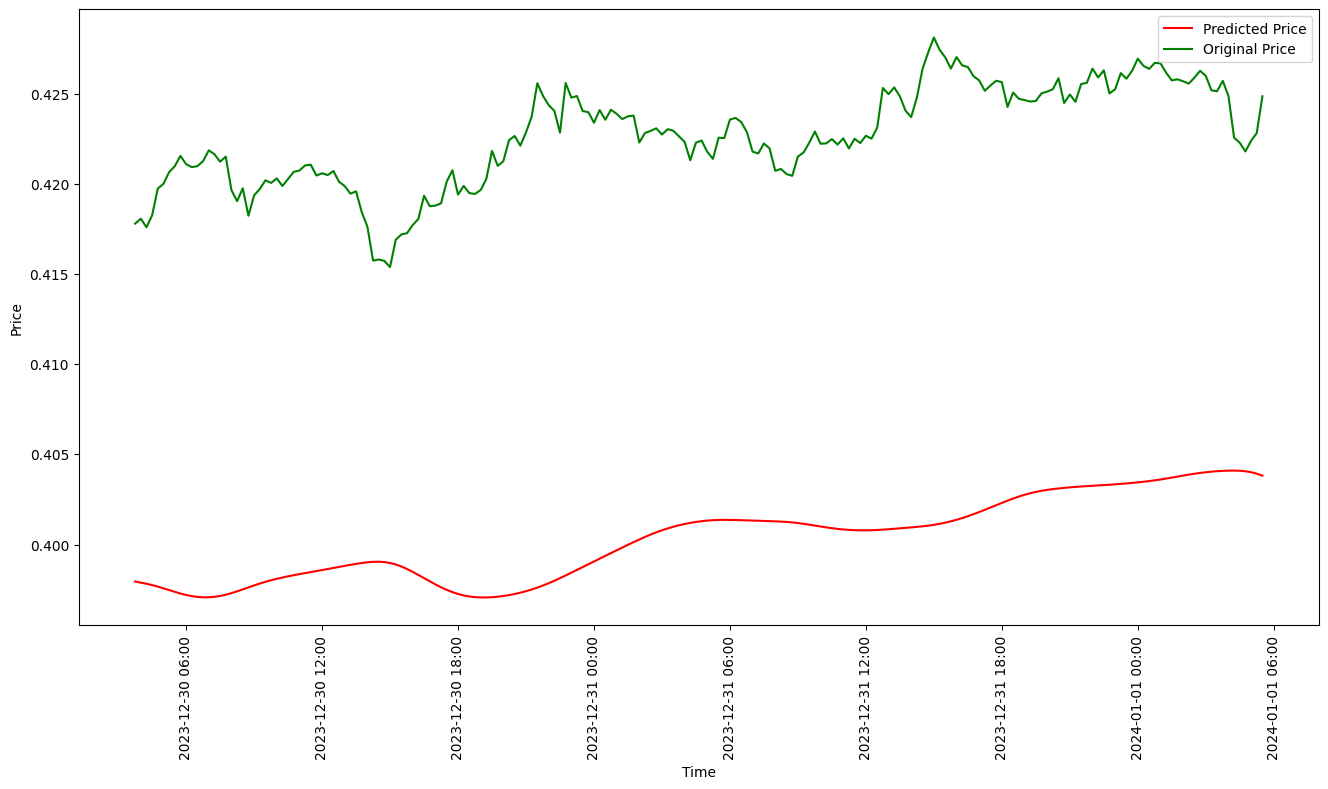

In [76]:

import matplotlib.pyplot as plt
from ipywidgets import Button, HBox
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

from datetime import datetime

# Function to plot the data chunk
def plot_data(start, end):
    plt.figure(figsize=(16, 8))
    plt.plot(timestamps[start:end], y_predict[start:end], 'r', label='Predicted Price')
    plt.plot(timestamps[start:end], y_tst[start:end], 'g', label='Original Price')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()

    # Setting the formatter for the x-axis to show full timestamp
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

    # Setting the locator to auto-adjust the ticks
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    # Setting the ticks to be vertical
    plt.xticks(rotation=90)

    plt.show()


"""
def plot_data(start, end):
    plt.figure(figsize=(20, 8))
    plt.plot(timestamps[start:end], y_predict[start:end], 'r', label='Predicted Price')
    plt.plot(timestamps[start:end], y_tstf[start:end], 'g', label='Original Price')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
"""

# Initial chunk size and starting index
chunk_size = 200  # Define the size of each chunk
current_start_index = len(timestamps) - chunk_size

# Function to handle button clicks for next
def on_next_clicked(b):
    global current_start_index
    current_start_index += chunk_size
    if current_start_index >= len(timestamps):
        current_start_index = len(timestamps) - chunk_size
    clear_output(wait=True)
    display(buttons)
    plot_data(current_start_index, current_start_index + chunk_size)

# Function to handle button clicks for previous
def on_prev_clicked(b):
    global current_start_index
    current_start_index -= chunk_size
    if current_start_index < 0:
        current_start_index = 0
    clear_output(wait=True)
    display(buttons)
    plot_data(current_start_index, current_start_index + chunk_size)

# Create buttons and assign click events
next_button = Button(description="Next")
prev_button = Button(description="Previous")
next_button.on_click(on_next_clicked)
prev_button.on_click(on_prev_clicked)
buttons = HBox([prev_button, next_button])

# Display the initial plot and buttons
display(buttons)
plot_data(current_start_index, current_start_index + chunk_size)


In [74]:

#model.save('Stock Predictions Model.keras')

from datetime import datetime
# print( datetime.now().strftime('%Y-%m-%d-%H%M') )
model.save(f"{model_path}/Model_{symbol}_{ctime}_{datetime.now(local_tz).strftime('%Y-%m-%d-%H%M')}.keras")

